In [1]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pd.set_option('display.max_rows', None)


In [19]:
coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
coffea_caff_env = pd.read_csv(r"..\data\coll_caff_node_env_w_class.csv")

coffee_data = coffea_caff_clim.copy()

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)



In [20]:
coffee_data

,clim_1_tmin1_Monthly minimum temperature - January (°C x 10),clim_2_tmin2_Monthly minimum temperature - February (°C x 10),clim_3_tmin3_Monthly minimum temperature - March (°C x 10),clim_4_tmin4_Monthly minimum temperature - April (°C x 10),clim_5_tmin5_Monthly minimum temperature - May (°C x 10),clim_6_tmin6_Monthly minimum temperature - June (°C x 10),clim_7_tmin7_Monthly minimum temperature - July (°C x 10),clim_8_tmin8_Monthly minimum temperature - August (°C x 10),clim_9_tmin9_Monthly minimum temperature - September (°C x 10),clim_10_tmin10_Monthly minimum temperature - October (°C x 10),...,clim_62_pet7_Monthly potential evapotranspiration from the Thornthwaite equation - July (mm.month-1),clim_63_pet8_Monthly potential evapotranspiration from the Thornthwaite equation - August (mm.month-1),clim_64_pet9_Monthly potential evapotranspiration from the Thornthwaite equation - September (mm.month-1),clim_65_pet10_Monthly potential evapotranspiration from the Thornthwaite equation - October (mm.month-1),clim_66_pet11_Monthly potential evapotranspiration from the Thornthwaite equation - November (mm.month-1),clim_67_pet12_Monthly potential evapotranspiration from the Thornthwaite equation - December (mm.month-1),clim_68_pet_Annual potential evapotranspiration from the Thornthwaite equation (mm),clim_69_cwd_Annual climatic water deficit (mm),clim_70_ndm_Number of dry months in the year (months.year-1),caffeine_class
0,156.0,198.0,186.0,160.0,133.0,118.0,109.0,115.0,133.0,180.0,...,45.0,51.0,68.0,109.0,123.0,138.0,1127.0,559.0,11.0,Absent
1,184.0,218.0,216.0,211.0,194.0,177.0,171.0,170.0,173.0,199.0,...,67.0,66.0,72.0,104.0,121.0,133.0,1228.0,40.0,4.0,Low
2,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,46.0,52.0,70.0,113.0,137.0,150.0,1203.0,460.0,11.0,Absent
3,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,46.0,52.0,70.0,113.0,137.0,150.0,1203.0,460.0,11.0,Absent
4,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,46.0,52.0,70.0,113.0,137.0,150.0,1203.0,460.0,11.0,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,156.0,192.0,185.0,169.0,136.0,116.0,115.0,123.0,134.0,173.0,...,42.0,47.0,58.0,95.0,108.0,118.0,998.0,116.0,6.0,Absent
522,204.0,226.0,229.0,222.0,204.0,184.0,174.0,181.0,189.0,218.0,...,79.0,85.0,98.0,140.0,144.0,142.0,1480.0,438.0,7.0,Absent
523,200.0,225.0,222.0,219.0,204.0,185.0,181.0,183.0,188.0,215.0,...,77.0,80.0,89.0,127.0,138.0,141.0,1394.0,360.0,8.0,Absent
524,200.0,225.0,222.0,219.0,204.0,185.0,181.0,183.0,188.0,215.0,...,77.0,80.0,89.0,127.0,138.0,141.0,1394.0,360.0,8.0,Absent


In [21]:
coffee_data.describe()

,clim_1_tmin1_Monthly minimum temperature - January (°C x 10),clim_2_tmin2_Monthly minimum temperature - February (°C x 10),clim_3_tmin3_Monthly minimum temperature - March (°C x 10),clim_4_tmin4_Monthly minimum temperature - April (°C x 10),clim_5_tmin5_Monthly minimum temperature - May (°C x 10),clim_6_tmin6_Monthly minimum temperature - June (°C x 10),clim_7_tmin7_Monthly minimum temperature - July (°C x 10),clim_8_tmin8_Monthly minimum temperature - August (°C x 10),clim_9_tmin9_Monthly minimum temperature - September (°C x 10),clim_10_tmin10_Monthly minimum temperature - October (°C x 10),...,clim_61_pet6_Monthly potential evapotranspiration from the Thornthwaite equation - June (mm.month-1),clim_62_pet7_Monthly potential evapotranspiration from the Thornthwaite equation - July (mm.month-1),clim_63_pet8_Monthly potential evapotranspiration from the Thornthwaite equation - August (mm.month-1),clim_64_pet9_Monthly potential evapotranspiration from the Thornthwaite equation - September (mm.month-1),clim_65_pet10_Monthly potential evapotranspiration from the Thornthwaite equation - October (mm.month-1),clim_66_pet11_Monthly potential evapotranspiration from the Thornthwaite equation - November (mm.month-1),clim_67_pet12_Monthly potential evapotranspiration from the Thornthwaite equation - December (mm.month-1),clim_68_pet_Annual potential evapotranspiration from the Thornthwaite equation (mm),clim_69_cwd_Annual climatic water deficit (mm),clim_70_ndm_Number of dry months in the year (months.year-1)
count,515.000000,515.000000,515.000000,515.000000,515.00000,515.000000,515.000000,515.000000,515.000000,515.000000,...,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,179.714563,212.840777,208.559223,197.733981,173.96699,156.644660,152.333981,154.899029,164.207767,196.256311,...,69.444660,60.252427,63.266019,74.805825,111.675728,127.085437,134.840777,1228.328155,284.464078,4.992233
std,25.754719,20.086822,20.855485,25.045350,30.25284,30.848506,30.180152,28.565875,27.151068,23.188123,...,17.018825,15.188388,15.325302,16.823447,20.045029,19.796447,17.924992,197.959295,294.865412,3.723406
min,103.000000,143.000000,143.000000,135.000000,113.00000,90.000000,88.000000,89.000000,89.000000,122.000000,...,45.000000,36.000000,38.000000,46.000000,74.000000,80.000000,87.000000,804.000000,0.000000,0.000000
25%,167.000000,207.000000,200.000000,185.000000,161.00000,144.000000,140.000000,144.000000,152.000000,183.000000,...,57.000000,49.000000,53.000000,64.000000,102.000000,118.500000,131.000000,1115.500000,18.000000,1.000000
50%,184.000000,220.000000,216.000000,205.000000,177.00000,157.000000,154.000000,162.000000,169.000000,201.000000,...,68.000000,58.000000,58.000000,69.000000,105.000000,126.000000,139.000000,1203.000000,179.000000,6.000000
75%,200.000000,226.000000,222.000000,216.000000,194.00000,177.000000,174.000000,173.000000,182.000000,212.000000,...,78.000000,68.000000,77.000000,89.000000,126.000000,139.000000,143.000000,1362.000000,576.000000,8.000000
max,224.000000,242.000000,242.000000,241.000000,234.00000,219.000000,209.000000,208.000000,213.000000,236.000000,...,115.000000,99.000000,108.000000,131.000000,189.000000,180.000000,182.000000,1829.000000,960.000000,12.000000


In [23]:
data = coffee_data.copy()
# Affichage des nombres, taux et types des valeurs manquantes par attribut
nb_m = data.isnull().sum().sort_values()
ratio_m = (data.isnull().sum()/data.shape[0]).sort_values()
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

pd.DataFrame({'Types': data[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
caffeine_class,object,0,0.000000
clim_1_tmin1_Monthly minimum temperature - January (°C x 10),float64,11,0.020913
clim_3_tmin3_Monthly minimum temperature - March (°C x 10),float64,11,0.020913
clim_2_tmin2_Monthly minimum temperature - February (°C x 10),float64,11,0.020913
clim_5_tmin5_Monthly minimum temperature - May (°C x 10),float64,11,0.020913
...,...,...,...
clim_67_pet12_Monthly potential evapotranspiration from the Thornthwaite equation - December (mm.month-1),float64,11,0.020913
clim_66_pet11_Monthly potential evapotranspiration from the Thornthwaite equation - November (mm.month-1),float64,11,0.020913
clim_68_pet_Annual potential evapotranspiration from the Thornthwaite equation (mm),float64,11,0.020913
clim_69_cwd_Annual climatic water deficit (mm),float64,11,0.020913


11 rows with missing data will be removed

In [24]:
cleaned_data = coffee_data.dropna()
missing_data = cleaned_data.isnull().sum()
missing_data

clim_1_tmin1_Monthly minimum temperature - January (°C x 10)                                                 0
clim_2_tmin2_Monthly minimum temperature - February (°C x 10)                                                0
clim_3_tmin3_Monthly minimum temperature - March (°C x 10)                                                   0
clim_4_tmin4_Monthly minimum temperature - April (°C x 10)                                                   0
clim_5_tmin5_Monthly minimum temperature - May (°C x 10)                                                     0
                                                                                                            ..
clim_67_pet12_Monthly potential evapotranspiration from the Thornthwaite equation - December (mm.month-1)    0
clim_68_pet_Annual potential evapotranspiration from the Thornthwaite equation (mm)                          0
clim_69_cwd_Annual climatic water deficit (mm)                                                               0
c

In [29]:
# Drop the 'caffeine_class' column and calculate the correlation matrix
correlation_matrix = cleaned_data.drop(columns=['caffeine_class']).corr()

threshold = 0.9
high_corr_features = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)]
print(high_corr_features.dropna(how='all', axis=0).dropna(how='all', axis=1))


                                                    clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  \
clim_1_tmin1_Monthly minimum temperature - Janu...                                                NaN              
clim_2_tmin2_Monthly minimum temperature - Febr...                                           0.942633              
clim_3_tmin3_Monthly minimum temperature - Marc...                                           0.959008              
clim_4_tmin4_Monthly minimum temperature - Apri...                                           0.961189              
clim_5_tmin5_Monthly minimum temperature - May ...                                                NaN              
...                                                                                               ...              
clim_65_pet10_Monthly potential evapotranspirat...                                                NaN              
clim_66_pet11_Monthly potential evapotranspirat...                      

In [30]:
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Remove self-correlations (where the correlation is exactly 1)
strong_correlations_filtered = strong_correlations.where(~strong_correlations.isin([1]))

# Drop rows and columns with all NaN values
strong_correlations_filtered = strong_correlations_filtered.dropna(how='all').dropna(axis=1, how='all')

# Display the strong correlations matrix
print(strong_correlations_filtered)

                                                    clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  \
clim_1_tmin1_Monthly minimum temperature - Janu...                                                NaN              
clim_2_tmin2_Monthly minimum temperature - Febr...                                           0.942633              
clim_3_tmin3_Monthly minimum temperature - Marc...                                           0.959008              
clim_4_tmin4_Monthly minimum temperature - Apri...                                           0.961189              
clim_5_tmin5_Monthly minimum temperature - May ...                                           0.884156              
...                                                                                               ...              
clim_66_pet11_Monthly potential evapotranspirat...                                           0.846090              
clim_67_pet12_Monthly potential evapotranspirat...                      

C:\Users\adm1\AppData\Local\Temp\ipykernel_27696\3997834173.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(f'Scatter plot of {var1} vs {var2} (Correlation: {top_correlations[i]:.2f})')


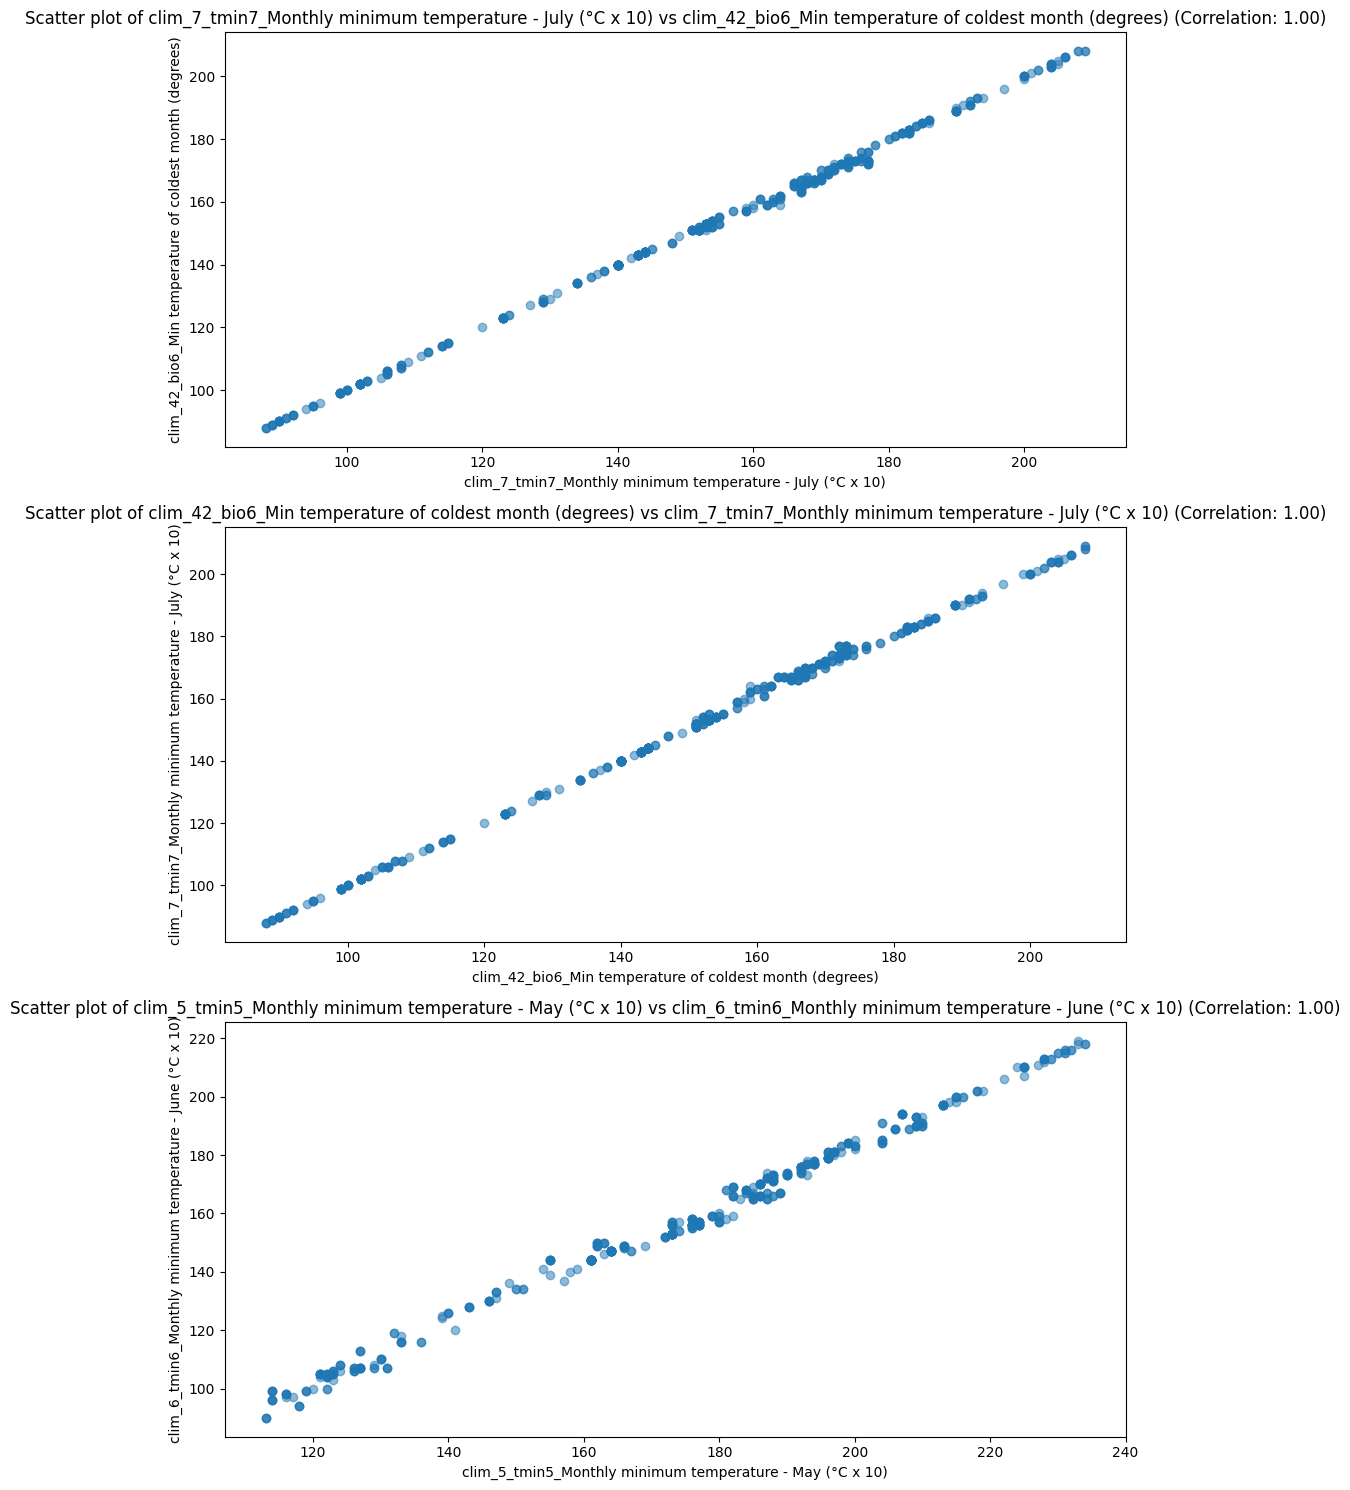

In [31]:
import matplotlib.pyplot as plt

# Select the top 3 strongest correlations
top_correlations = strong_correlations_filtered.unstack().dropna().abs().nlargest(3)

# Get the pairs of variables with the strongest correlations
top_correlated_pairs = top_correlations.index

# Generate scatter plots for the top 3 correlated pairs
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (var1, var2) in enumerate(top_correlated_pairs):
    axes[i].scatter(coffee_data[var1], coffee_data[var2], alpha=0.5)
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)
    axes[i].set_title(f'Scatter plot of {var1} vs {var2} (Correlation: {top_correlations[i]:.2f})')

plt.tight_layout()
plt.show()


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


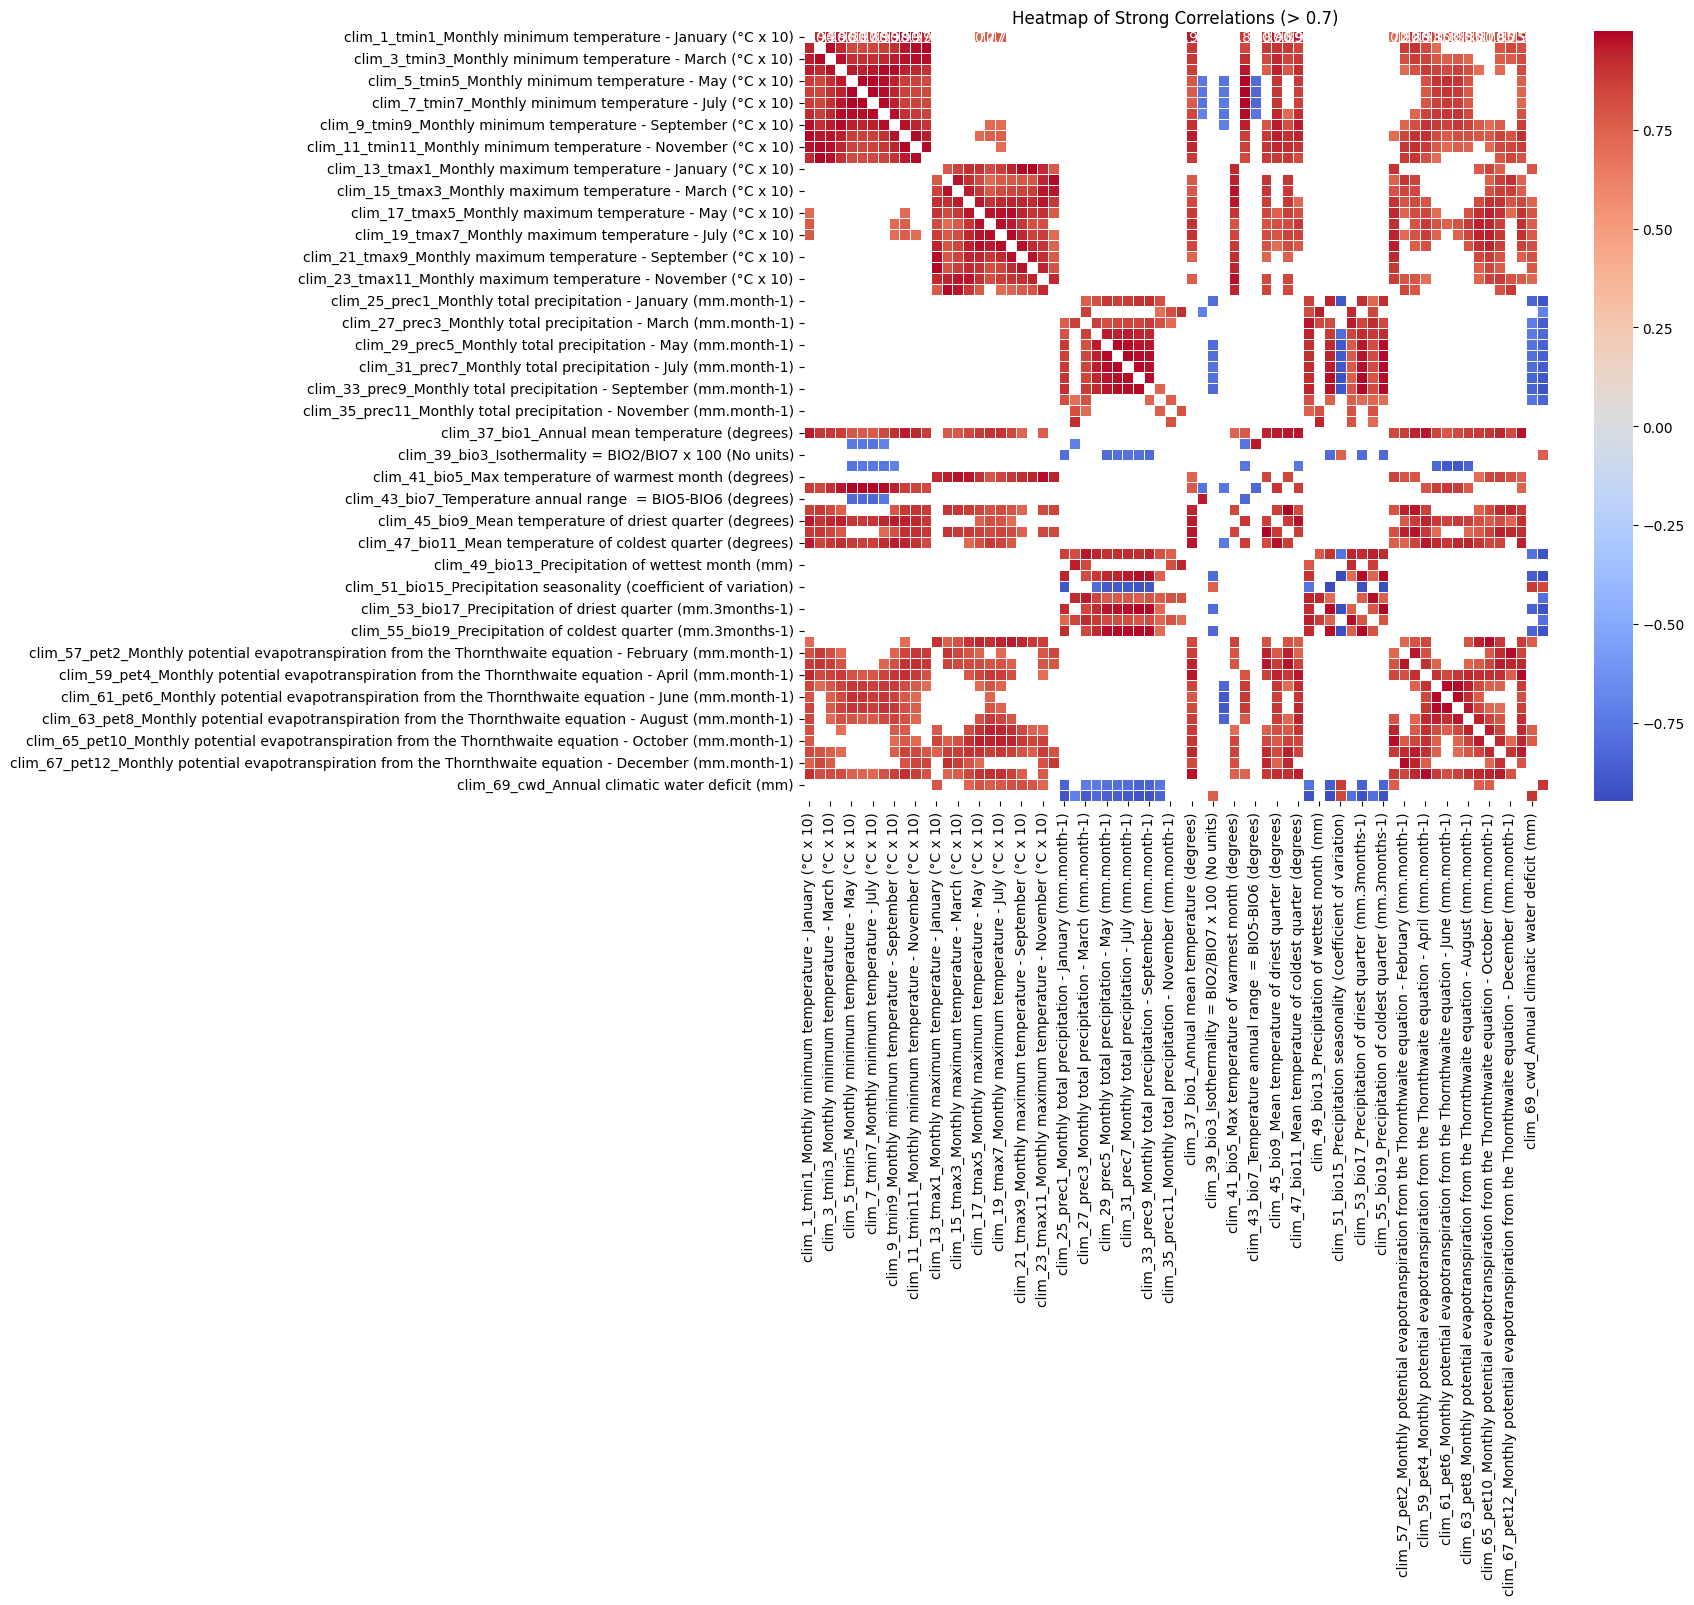

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 10))

# Generate the heatmap using seaborn
sns.heatmap(strong_correlations_filtered, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title and labels
plt.title('Heatmap of Strong Correlations (> 0.7)')
plt.show()


Since many attributes are correlated, we will reduce them